In [1]:
import h5py
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from reproducibility.utils import data_sample, data_preprocess, set_seed, read_data
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

2023-12-07 13:52:25.920259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

In [2]:
####################################  Read dataset  ####################################

mat, obs, var, uns = read_data('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Mouse_k.h5', sparsify=False, skip_exprs=False)
x = np.array(mat.toarray())
cell_name = np.array(obs["cell_type1"])
cell_type, y = np.unique(cell_name, return_inverse=True)

####################################  Run without sampling  ####################################

seed = 2023
set_seed(seed)

adata = sc.AnnData(x)
adata.obs['celltype'] = y

adata = data_preprocess(adata)

In [3]:
adata

AnnData object with n_obs × n_vars = 3660 × 18308
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [4]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_mk.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_mk.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 27
Initial Clustering: NMI= 0.7152, ARI= 0.4387
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2856, kld loss:9.8666, cluster loss:0.6368, total loss:1.0211


Training::   0%|                           | 1/500 [01:10<9:42:51, 70.08s/epoch]

Clustering   1: NMI= 0.7080, ARI= 0.4354, Delta=0.0932
Train epoch [2/500]. ZINB loss:0.2864, kld loss:15.4150, cluster loss:0.5114, total loss:0.9520


Training::   0%|                           | 2/500 [02:09<8:48:49, 63.71s/epoch]

Clustering   2: NMI= 0.7138, ARI= 0.4367, Delta=0.0760
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 26
count_true: 325
count: 306
-----------------iter: 2-----------------
n_clusters: 25
count_true: 300
count: 291
-----------------iter: 3-----------------
n_clusters: 24
count_true: 276
count: 268
-----------------iter: 4-----------------
n_clusters: 23
count_true: 253
count: 245
-----------------iter: 5-----------------
n_clusters: 22
count_true: 231
count: 226
-----------------iter: 6-----------------
n_clusters: 21
count_true: 210
count: 206
-----------------iter: 7-----------------
n_clusters: 20
count_true: 190
count: 187
-----------------iter: 8-----------------
n_clusters: 19
count_true: 171
count: 169
-----------------iter: 9-----------------
n_clusters: 18
count_true: 153
count: 152
-----------------iter: 10-----------------
n_clusters: 17
count_true: 136
count: 136
Reach count!
Train epoch [3/500]. ZINB loss:0.2872, 

Training::   1%|▏                          | 3/500 [02:57<7:50:29, 56.80s/epoch]

Clustering   3: NMI= 0.7649, ARI= 0.5697, Delta=0.0451
Train epoch [4/500]. ZINB loss:0.2857, kld loss:29.2985, cluster loss:0.5587, total loss:1.1373


Training::   1%|▏                          | 4/500 [03:53<7:44:32, 56.20s/epoch]

Clustering   4: NMI= 0.7631, ARI= 0.5646, Delta=0.4358
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 16
count_true: 120
count: 112
-----------------iter: 2-----------------
n_clusters: 15
count_true: 105
count: 101
-----------------iter: 3-----------------
n_clusters: 14
count_true: 91
count: 87
-----------------iter: 4-----------------
n_clusters: 13
count_true: 78
count: 75
-----------------iter: 5-----------------
n_clusters: 12
count_true: 66
count: 64
-----------------iter: 6-----------------
n_clusters: 11
count_true: 55
count: 53
-----------------iter: 7-----------------
n_clusters: 10
count_true: 45
count: 45
Reach count!
Train epoch [5/500]. ZINB loss:0.2862, kld loss:33.2784, cluster loss:0.4693, total loss:1.0883


Training::   1%|▎                          | 5/500 [04:35<7:03:37, 51.35s/epoch]

Clustering   5: NMI= 0.8523, ARI= 0.7986, Delta=0.0191
Train epoch [6/500]. ZINB loss:0.2873, kld loss:35.6783, cluster loss:0.4853, total loss:1.1294


Training::   1%|▎                          | 6/500 [05:22<6:50:40, 49.88s/epoch]

Clustering   6: NMI= 0.8534, ARI= 0.7990, Delta=0.6500
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 9
count_true: 36
count: 36
Reach count!
Train epoch [7/500]. ZINB loss:0.2858, kld loss:37.7957, cluster loss:0.4438, total loss:1.1075


Training::   1%|▍                          | 7/500 [06:24<7:20:13, 53.58s/epoch]

Clustering   7: NMI= 0.8824, ARI= 0.8655, Delta=0.0066
Train epoch [8/500]. ZINB loss:0.2875, kld loss:38.5421, cluster loss:0.4510, total loss:1.1239


Training::   2%|▍                          | 8/500 [07:02<6:40:13, 48.81s/epoch]

Clustering   8: NMI= 0.8865, ARI= 0.8692, Delta=0.2025
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 8
count_true: 28
count: 28
Reach count!
Train epoch [9/500]. ZINB loss:0.2892, kld loss:38.8680, cluster loss:0.4128, total loss:1.0906


Training::   2%|▍                          | 9/500 [07:45<6:22:57, 46.80s/epoch]

Clustering   9: NMI= 0.9109, ARI= 0.9312, Delta=0.0041
Train epoch [10/500]. ZINB loss:0.2885, kld loss:39.3431, cluster loss:0.4231, total loss:1.1050


Training::   2%|▌                         | 10/500 [08:25<6:06:27, 44.87s/epoch]

Clustering   10: NMI= 0.9116, ARI= 0.9324, Delta=0.1475
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 8
count_true: 28
count: 28
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [11/500]. ZINB loss:0.2896, kld loss:40.2788, cluster loss:0.4100, total loss:1.1024


Training::   2%|▌                         | 11/500 [09:02<6:42:04, 49.33s/epoch]

Clustering   11: NMI= 0.9118, ARI= 0.9326, Delta=0.0014
Reach tolerance threshold. Stopping training.
Total time: 564.3847012519836 seconds


In [5]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.93258, NMI = 0.91176


## Visualization

### Show final clustering results

In [6]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


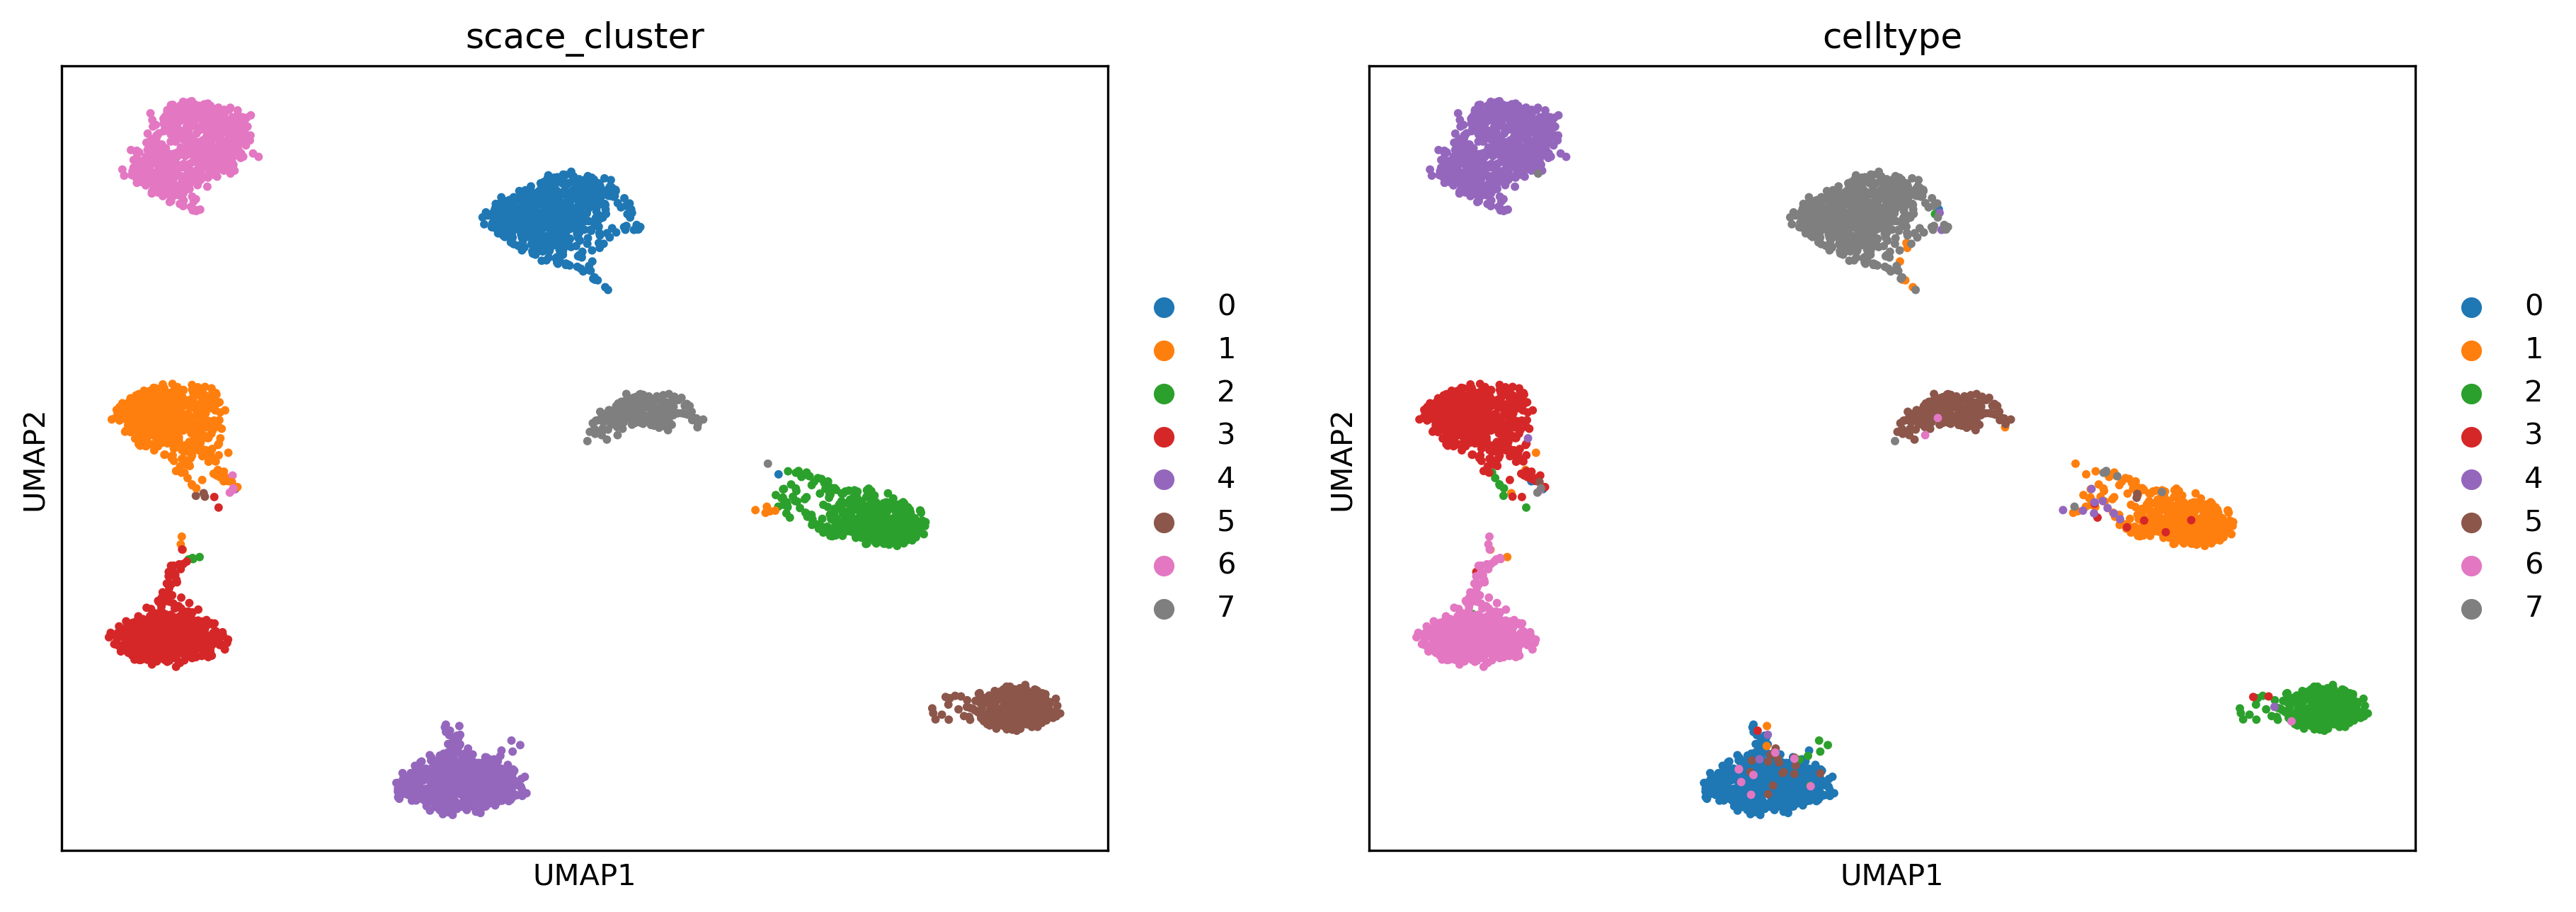

In [7]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [8]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


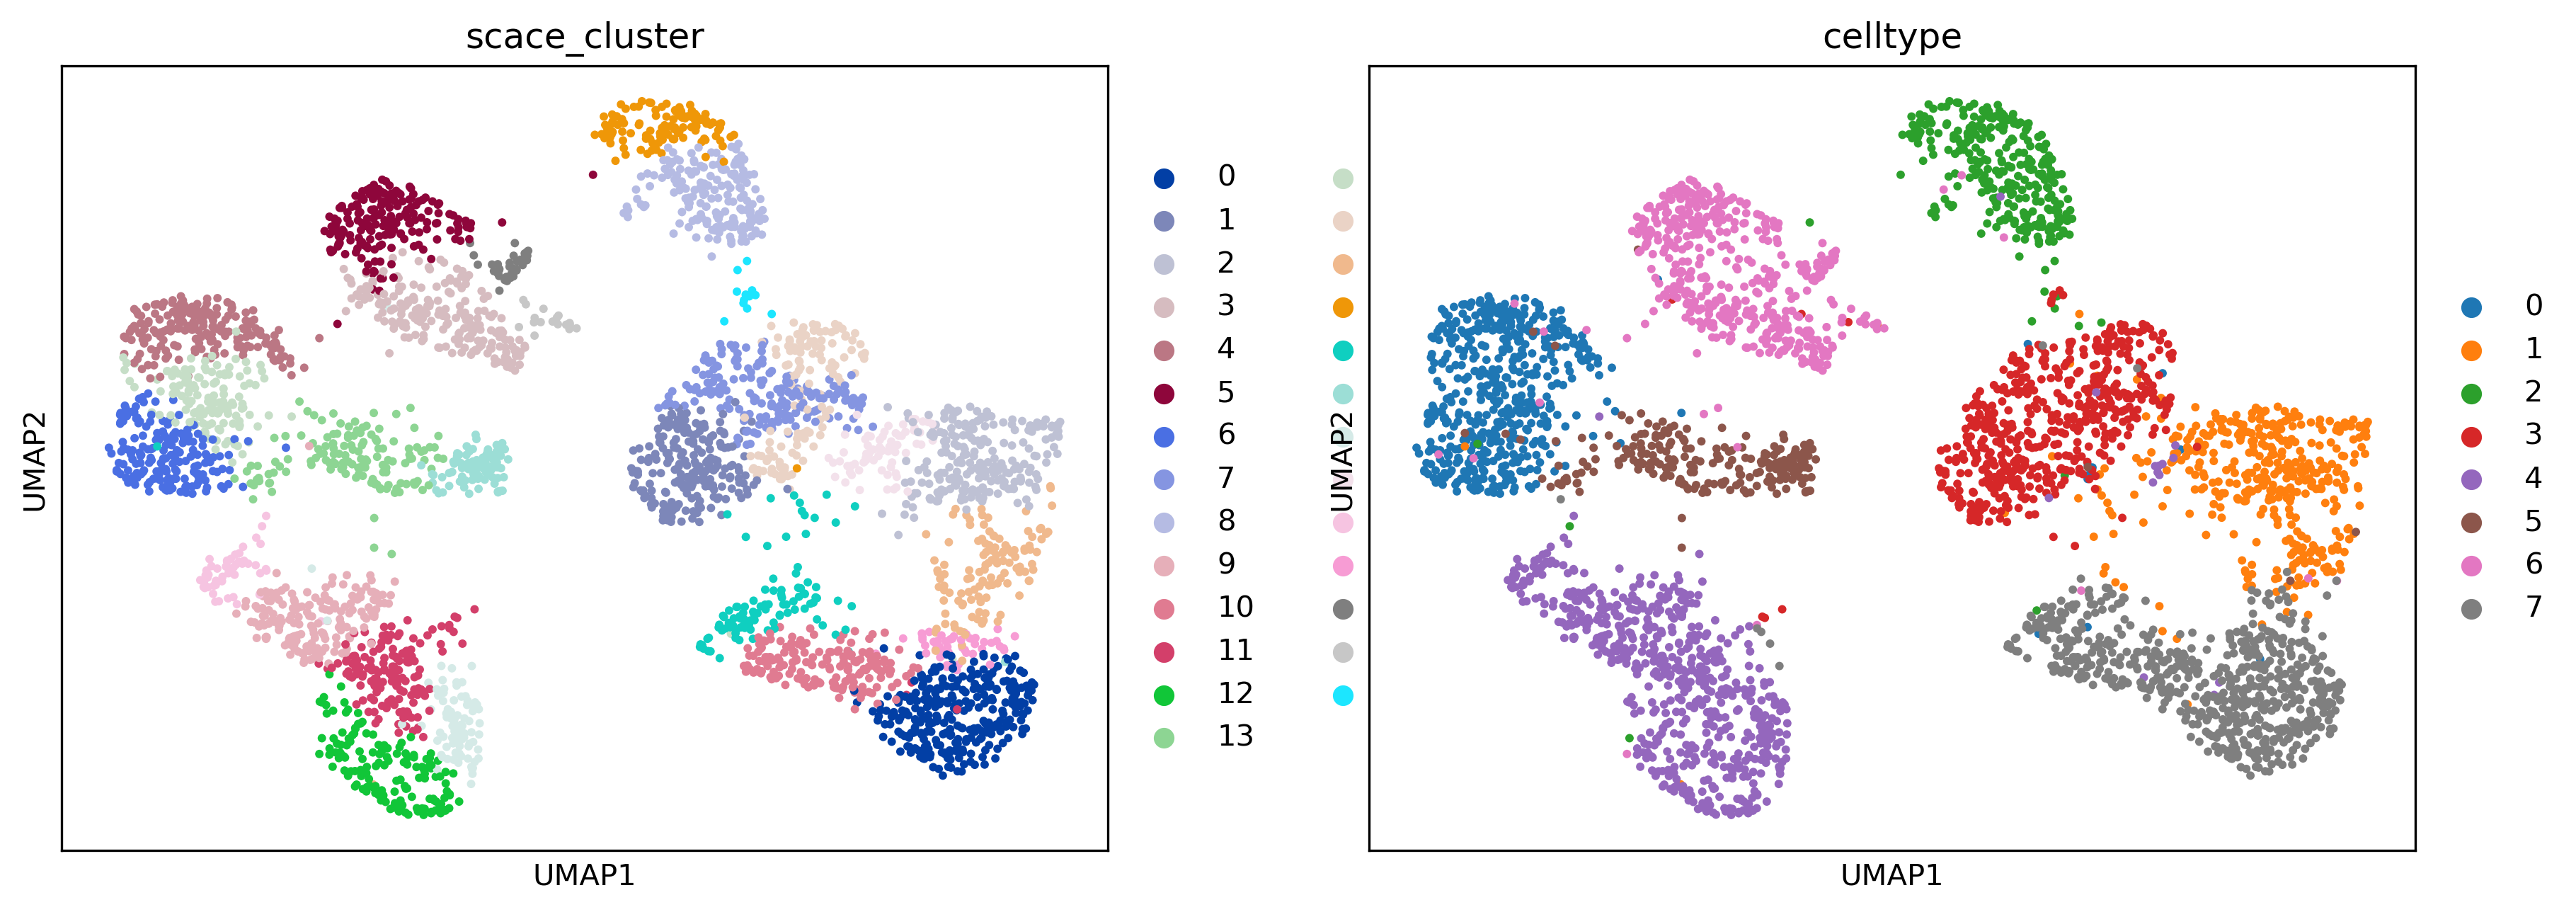

In [9]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [10]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


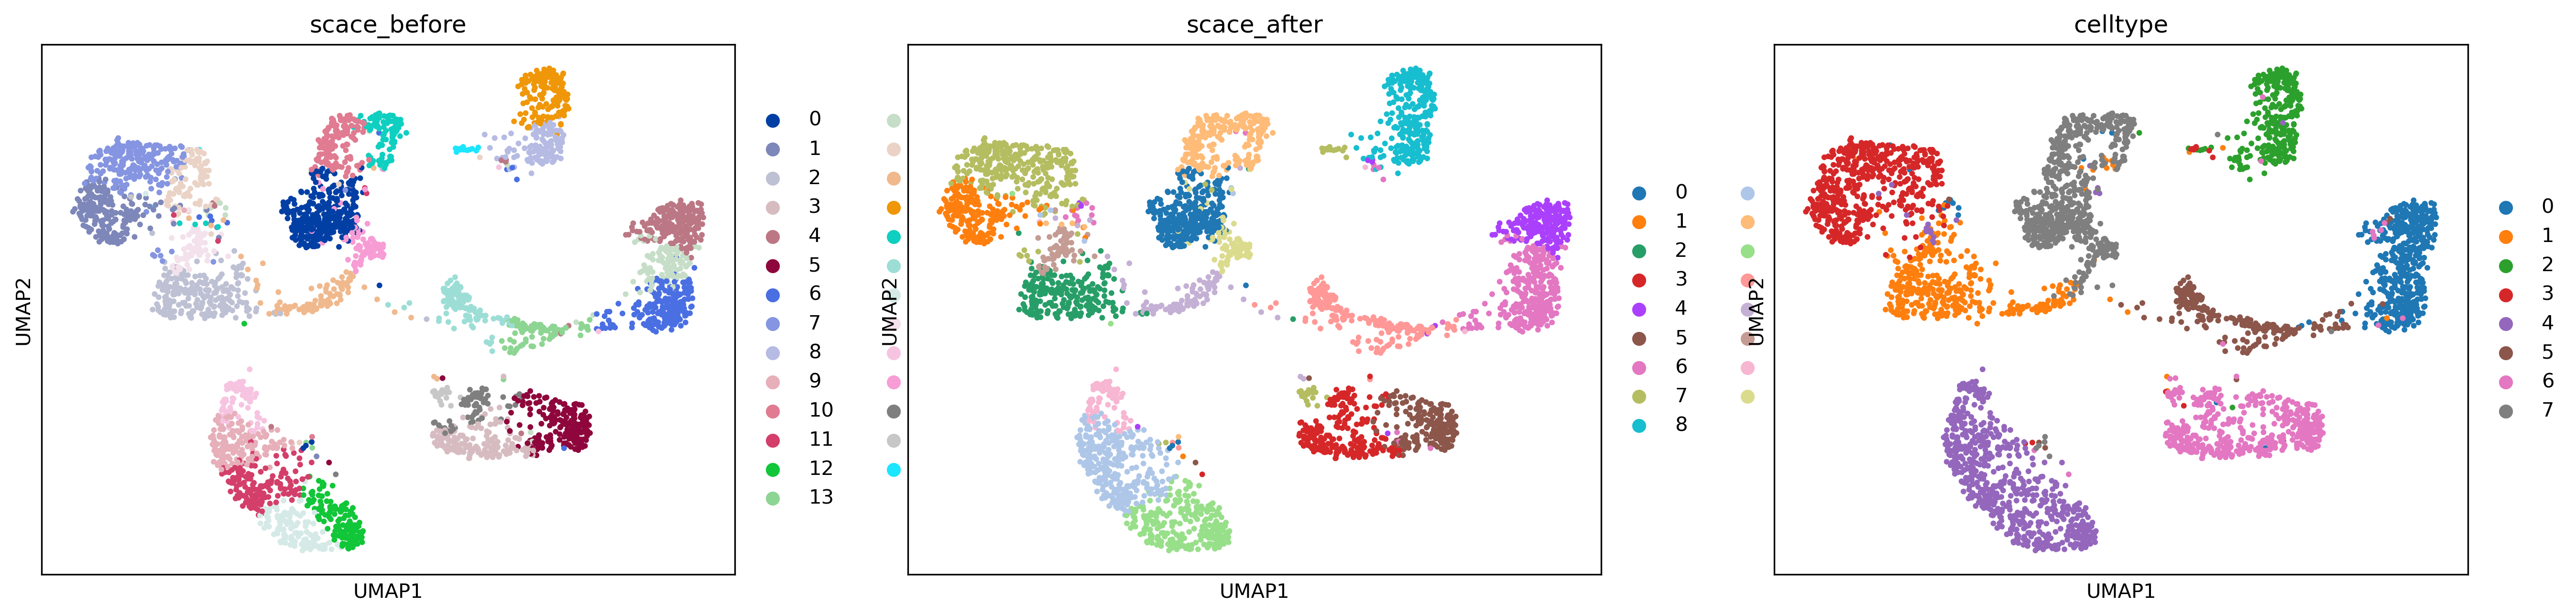

In [11]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [12]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


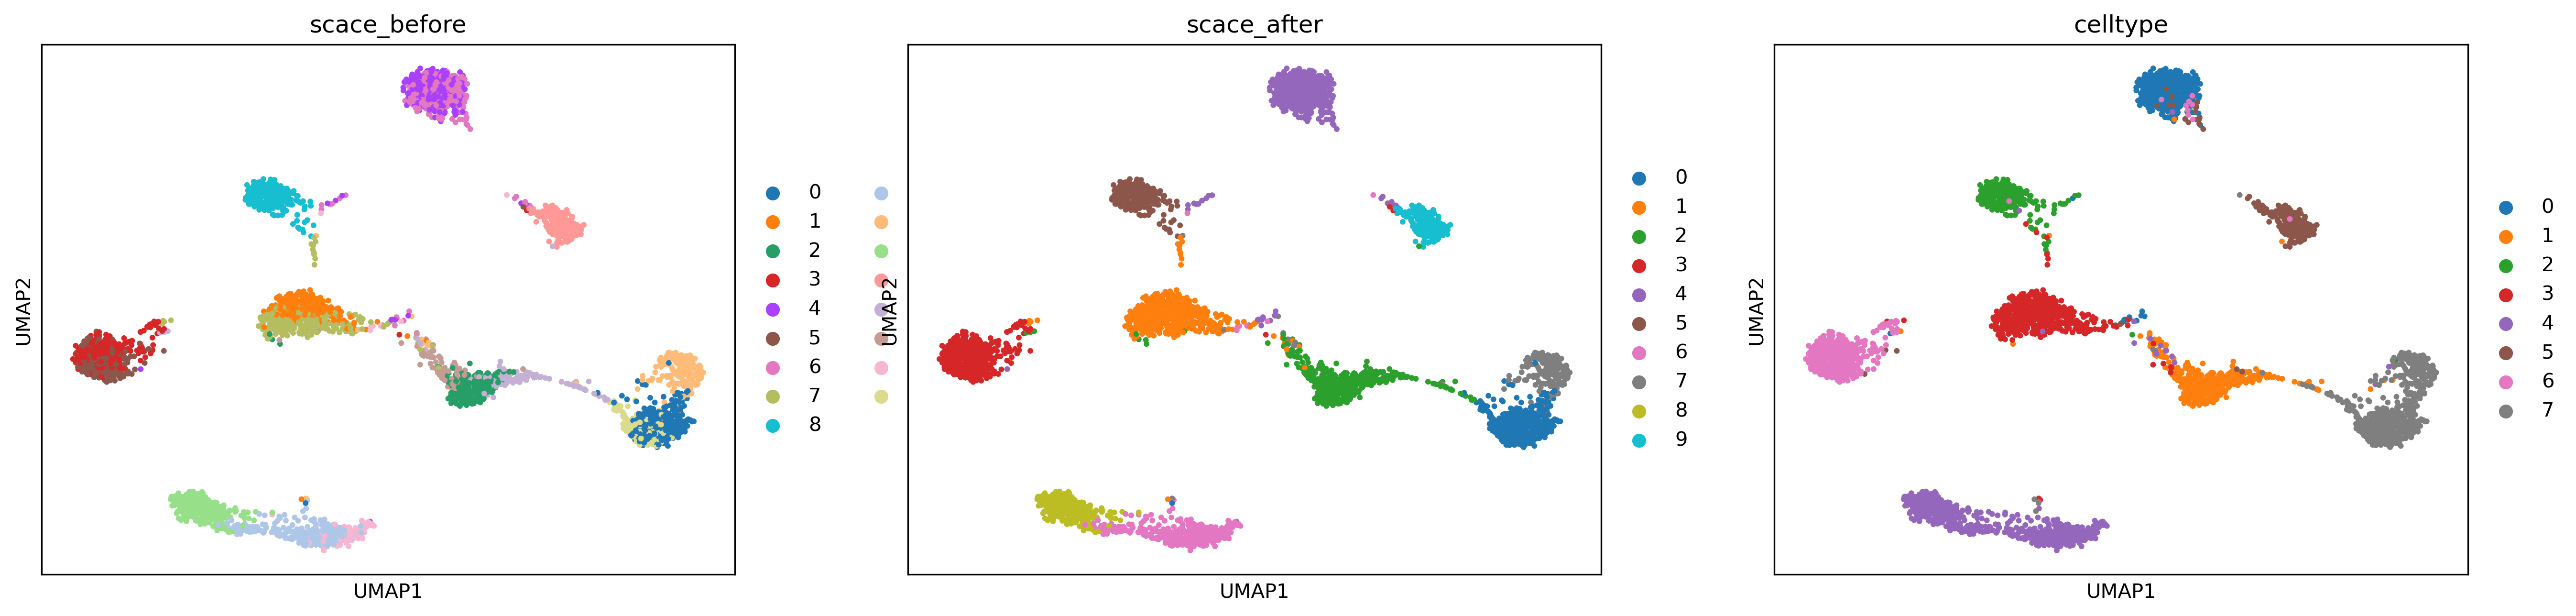

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])